In [19]:
#Attempt to clear up test set confusion

In [1]:
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff
import statsmodels as sm
#https://www.statsmodels.org/dev/vector_ar.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.simplefilter('ignore')
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [2]:
#https://stackoverflow.com/questions/20681297/vector-autoregressive-model-fitting-with-scikit-learn
#https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/
#https://blog.devgenius.io/implementing-vector-autoregression-from-scratch-with-python-b12eedbf35ad
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff

#Bayesian VAR
#https://github.com/joergrieger/pybvar

In [3]:
#RMSE loss function

In [4]:
train_df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/twitter_reddit_time_series_copy3.csv')
train_df = train_df.set_index('date')
#train = train.iloc[20:,:]
train_df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959,1.070900
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.069733
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.071044


In [8]:
#train_df = train.iloc[:,4:]
train_df = train_df[['BEIR', 'interest_rate_1yr_lag', 'commodities_1yr_lag',
       'UNRATENSA_1yr_lag', 'UMCSENT_2wk_lag', 'WM2NS_1yr_lag', 'gdp_1yr_lag',
       'USDEUR_1yr_lag']]

In [9]:
#https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [11]:
#Visualising time series

In [12]:
#Granger causality test

In [13]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(train_df, variables = train_df.columns)  

,BEIR_x,interest_rate_1yr_lag_x,commodities_1yr_lag_x,UNRATENSA_1yr_lag_x,UMCSENT_2wk_lag_x,WM2NS_1yr_lag_x,gdp_1yr_lag_x,USDEUR_1yr_lag_x
BEIR_y,1.0000,0.2165,0.1209,0.0434,0.0020,0.0525,0.0704,0.0575
interest_rate_1yr_lag_y,0.0053,1.0000,0.0000,0.0004,0.0000,0.0000,0.0000,0.0000
commodities_1yr_lag_y,0.2413,0.2642,1.0000,0.4093,0.7968,0.0083,0.6282,0.0151
UNRATENSA_1yr_lag_y,0.4411,0.0425,0.8691,1.0000,0.2437,0.0375,0.2335,0.4836
UMCSENT_2wk_lag_y,0.2582,0.9392,0.0240,0.0204,1.0000,0.0461,0.0108,0.0425
WM2NS_1yr_lag_y,0.0458,0.1279,0.0206,0.0061,0.0018,1.0000,0.0004,0.3534
gdp_1yr_lag_y,0.1724,0.0109,0.0654,0.6144,0.3670,0.0074,1.0000,0.0119
USDEUR_1yr_lag_y,0.0308,0.1072,0.0361,0.2170,0.2927,0.0002,0.2348,1.0000


In [14]:
#Cointegration test

In [15]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(train_df)
#cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
BEIR   ::  153.84    > 143.6691  =>   True
interest_rate_1yr_lag ::  107.99    > 111.7797  =>   False
commodities_1yr_lag ::  74.89     > 83.9383   =>   False
UNRATENSA_1yr_lag ::  49.75     > 60.0627   =>   False
UMCSENT_2wk_lag ::  30.69     > 40.1749   =>   False
WM2NS_1yr_lag ::  14.72     > 24.2761   =>   False
gdp_1yr_lag ::  6.49      > 12.3212   =>   False
USDEUR_1yr_lag ::  0.18      > 4.1296    =>   False


In [16]:
#Train test split

In [17]:
nobs = 31
#df_train, df_test = train_df[0:-nobs], train_df[-nobs:]
df_train = train_df

In [19]:
#Stationarity test

In [20]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [21]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    #print(name, column)

    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7061
 No. Lags Chosen       = 0
 Critical value 1%     = -3.448
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.428. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "interest_rate_1yr_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7021
 No. Lags Chosen       = 4
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.8462. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "commodities_1yr_lag" 
    -----------------------------------------------
 Null

In [22]:
train_df_differenced = df_train.diff().dropna()

In [23]:
for name, column in train_df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -20.1268
 No. Lags Chosen       = 0
 Critical value 1%     = -3.448
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "interest_rate_1yr_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.9327
 No. Lags Chosen       = 3
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "commodities_1yr_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary

In [24]:
df_train

,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,
01/06/2021,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...
27/05/2022,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959,1.070900
28/05/2022,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.069733
29/05/2022,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.071044


In [25]:
train_df_differenced

,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,
02/06/2021,-0.020,0.01,0.0,0.0,0.0,0.0,0.0,-0.002800
03/06/2021,-0.020,0.00,0.0,0.0,0.0,0.0,0.0,-0.009100
04/06/2021,-0.020,0.00,0.0,0.0,0.0,0.0,0.0,0.005100
05/06/2021,0.000,0.01,0.0,0.0,0.0,0.0,0.0,-0.000367
06/06/2021,0.000,0.00,0.0,0.0,0.0,0.0,0.0,-0.001456
...,...,...,...,...,...,...,...,...
27/05/2022,0.010,0.00,0.0,0.0,0.0,0.0,0.0,-0.001600
28/05/2022,0.000,-0.01,0.0,0.0,0.0,0.0,0.0,-0.001167
29/05/2022,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.001311


In [26]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=14, fontweight="bold", fontname="Verdana")

In [27]:
#train_df_differenced.columns

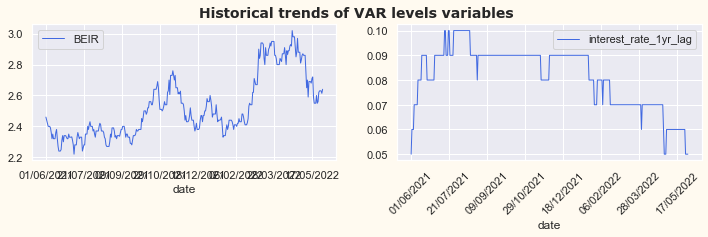

In [28]:
plot_vars(train_df, levels = ['BEIR', 'interest_rate_1yr_lag'], color="royalblue", leveltype="levels", name='levels1')

In [29]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    #fig.savefig(name, bbox_inches='tight')

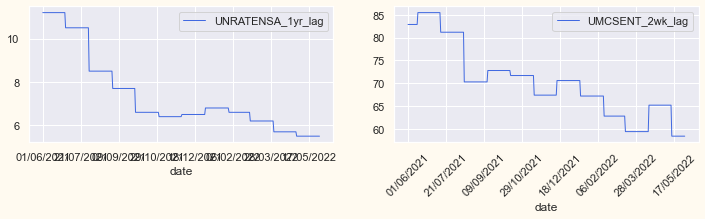

In [30]:
plot_vars(train_df, levels = ['UNRATENSA_1yr_lag', 'UMCSENT_2wk_lag'], color="royalblue", leveltype="levels", name='levels2')

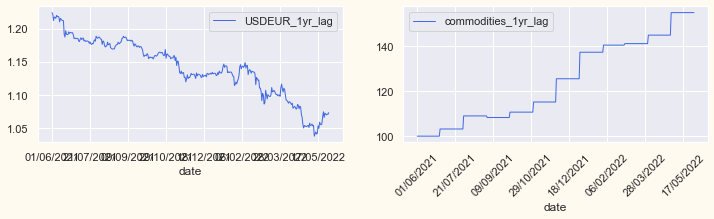

In [31]:
plot_vars(train_df, levels = ['USDEUR_1yr_lag', 'commodities_1yr_lag'], color="royalblue", leveltype="levels", name='levels3')

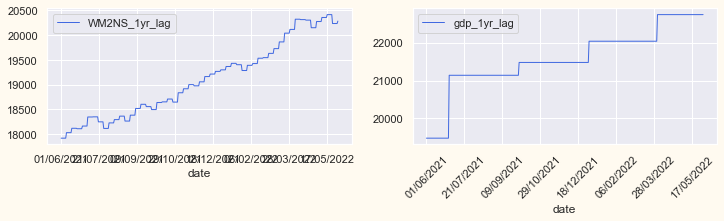

In [32]:
plot_vars(train_df, levels = ['WM2NS_1yr_lag', 'gdp_1yr_lag'], color="royalblue", leveltype="levels", name='levels4')

In [34]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    #fig.savefig(name, bbox_inches='tight')
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=14, fontweight="bold", fontname="Verdana")

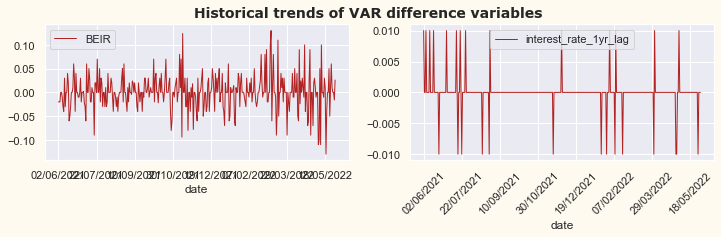

In [35]:
plot_vars(train_df_differenced, levels = ['BEIR', 'interest_rate_1yr_lag'], color="firebrick", leveltype="difference", name='difference1')

In [36]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')

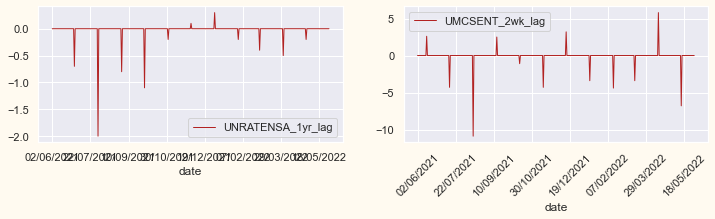

In [37]:
plot_vars(train_df_differenced, levels = ['UNRATENSA_1yr_lag', 'UMCSENT_2wk_lag'], color="firebrick", leveltype="difference", name='difference2')

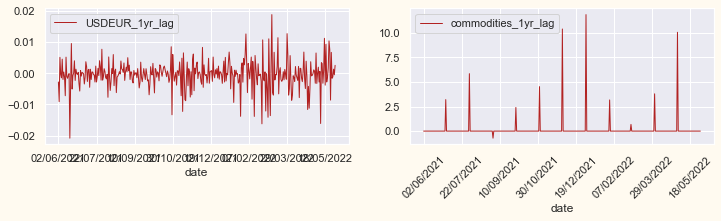

In [38]:
plot_vars(train_df_differenced, levels = ['USDEUR_1yr_lag', 'commodities_1yr_lag'], color="firebrick", leveltype="difference", name='difference3')

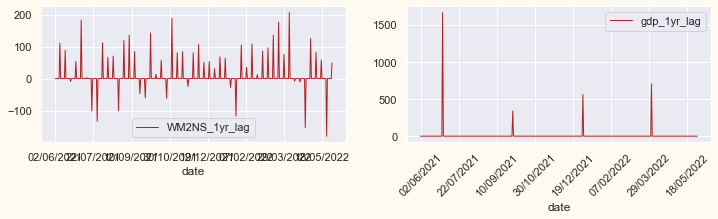

In [39]:
plot_vars(train_df_differenced, levels = ['WM2NS_1yr_lag', 'gdp_1yr_lag'], color="firebrick", leveltype="difference", name='difference4')

In [41]:
#Selecting appropriate lag
train_df_differenced

,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,
02/06/2021,-0.020,0.01,0.0,0.0,0.0,0.0,0.0,-0.002800
03/06/2021,-0.020,0.00,0.0,0.0,0.0,0.0,0.0,-0.009100
04/06/2021,-0.020,0.00,0.0,0.0,0.0,0.0,0.0,0.005100
05/06/2021,0.000,0.01,0.0,0.0,0.0,0.0,0.0,-0.000367
06/06/2021,0.000,0.00,0.0,0.0,0.0,0.0,0.0,-0.001456
...,...,...,...,...,...,...,...,...
27/05/2022,0.010,0.00,0.0,0.0,0.0,0.0,0.0,-0.001600
28/05/2022,0.000,-0.01,0.0,0.0,0.0,0.0,0.0,-0.001167
29/05/2022,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.001311


In [43]:
model = VAR(train_df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    
#Almost all criteria hit minimum at 1 lag

Lag Order = 1
AIC :  -16.82274301462432
BIC :  -16.05029947724947
FPE :  4.9432303948532716e-08
HQIC:  -16.515700411591347 

Lag Order = 2
AIC :  -16.58631136441172
BIC :  -15.124257185383255
FPE :  6.264648418889479e-08
HQIC:  -16.00509161188485 

Lag Order = 3
AIC :  -16.34759659397845
BIC :  -14.193093569971316
FPE :  7.963436159106157e-08
HQIC:  -15.491014344580083 

Lag Order = 4
AIC :  -16.18408802772104
BIC :  -13.334278404657589
FPE :  9.400111748473031e-08
HQIC:  -15.050949685790576 

Lag Order = 5
AIC :  -16.054289928212004
BIC :  -12.50629621393859
FPE :  1.0744543885817726e-07
HQIC:  -14.643393571210101 

Lag Order = 6
AIC :  -15.803861637241914
BIC :  -11.554786411909303
FPE :  1.3882794129663833e-07
HQIC:  -14.11399693620649 

Lag Order = 7
AIC :  -15.613729495695955
BIC :  -10.660655219809357
FPE :  1.6928479698815515e-07
HQIC:  -13.643677634736184 

Lag Order = 8
AIC :  -15.340050018536758
BIC :  -9.680038838640534
FPE :  2.2505482425750722e-07
HQIC:  -13.08858361335097

In [44]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 14, Aug, 2022
Time:                     11:47:57
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -16.0503
Nobs:                     363.000    HQIC:                  -16.5157
Log likelihood:          -995.270    FPE:                4.94323e-08
AIC:                     -16.8227    Det(Omega_mle):     4.06369e-08
--------------------------------------------------------------------
Results for equation BEIR
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.000813         0.001992            0.408           0.683
L1.BEIR                         -0.064291         0.052938           -1.214           0.225
L1.interest_rate_

In [45]:
#Checking for serial correlation#
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(train_df_differenced.columns, out):
    print(str(col), ':', round(val, 2))

BEIR : 2.0
interest_rate_1yr_lag : 2.02
commodities_1yr_lag : 2.01
UNRATENSA_1yr_lag : 2.01
UMCSENT_2wk_lag : 1.99
WM2NS_1yr_lag : 2.01
gdp_1yr_lag : 2.0
USDEUR_1yr_lag : 2.05


In [46]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train_df_differenced.values[-lag_order:]
forecast_input

1


array([[2.60000e-02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        4.88000e+01, 0.00000e+00, 2.54074e-03]])

In [47]:
#df_train
train_df_differenced

,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,
02/06/2021,-0.020,0.01,0.0,0.0,0.0,0.0,0.0,-0.002800
03/06/2021,-0.020,0.00,0.0,0.0,0.0,0.0,0.0,-0.009100
04/06/2021,-0.020,0.00,0.0,0.0,0.0,0.0,0.0,0.005100
05/06/2021,0.000,0.01,0.0,0.0,0.0,0.0,0.0,-0.000367
06/06/2021,0.000,0.00,0.0,0.0,0.0,0.0,0.0,-0.001456
...,...,...,...,...,...,...,...,...
27/05/2022,0.010,0.00,0.0,0.0,0.0,0.0,0.0,-0.001600
28/05/2022,0.000,-0.01,0.0,0.0,0.0,0.0,0.0,-0.001167
29/05/2022,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.001311


In [48]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_train.index[-nobs:], columns=df_train.columns + '_1d')
df_forecast

,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d,gdp_1yr_lag_1d,USDEUR_1yr_lag_1d
date,,,,,,,,
01/05/2022,-0.004251,0.000013,0.158428,-0.016106,-0.148189,3.837275,-0.124931,-0.000159
02/05/2022,0.000639,-0.000061,0.155433,-0.015042,-0.064252,6.655705,8.810106,-0.000519
03/05/2022,0.000622,-0.000027,0.152789,-0.016026,-0.066330,6.570162,9.295130,-0.000388
04/05/2022,0.000511,-0.000023,0.152342,-0.015747,-0.068279,6.499379,8.968936,-0.000409
05/05/2022,0.000536,-0.000025,0.152382,-0.015758,-0.067807,6.517448,9.009017,-0.000408
06/05/2022,0.000534,-0.000025,0.152397,-0.015765,-0.067861,6.515386,9.010519,-0.000408
07/05/2022,0.000534,-0.000025,0.152392,-0.015764,-0.067862,6.515384,9.009210,-0.000408
08/05/2022,0.000534,-0.000025,0.152392,-0.015764,-0.067860,6.515430,9.009416,-0.000408
09/05/2022,0.000534,-0.000025,0.152392,-0.015764,-0.067861,6.515421,9.009410,-0.000408


In [49]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [50]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)

In [51]:
df_results
#.iloc[:,6:]

,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d,gdp_1yr_lag_1d,USDEUR_1yr_lag_1d,BEIR_forecast,interest_rate_1yr_lag_forecast,commodities_1yr_lag_forecast,UNRATENSA_1yr_lag_forecast,UMCSENT_2wk_lag_forecast,WM2NS_1yr_lag_forecast,gdp_1yr_lag_forecast,USDEUR_1yr_lag_forecast
date,,,,,,,,,,,,,,,,
01/05/2022,-0.004251,0.000013,0.158428,-0.016106,-0.148189,3.837275,-0.124931,-0.000159,2.635749,0.050013,155.259007,5.483894,58.251811,20287.737275,22740.834069,1.072941
02/05/2022,0.000639,-0.000061,0.155433,-0.015042,-0.064252,6.655705,8.810106,-0.000519,2.636387,0.049952,155.414440,5.468852,58.187559,20294.392980,22749.644176,1.072423
03/05/2022,0.000622,-0.000027,0.152789,-0.016026,-0.066330,6.570162,9.295130,-0.000388,2.637010,0.049925,155.567228,5.452825,58.121228,20300.963143,22758.939306,1.072034
04/05/2022,0.000511,-0.000023,0.152342,-0.015747,-0.068279,6.499379,8.968936,-0.000409,2.637521,0.049902,155.719570,5.437078,58.052949,20307.462522,22767.908242,1.071625
05/05/2022,0.000536,-0.000025,0.152382,-0.015758,-0.067807,6.517448,9.009017,-0.000408,2.638058,0.049877,155.871952,5.421320,57.985143,20313.979970,22776.917259,1.071217
06/05/2022,0.000534,-0.000025,0.152397,-0.015765,-0.067861,6.515386,9.010519,-0.000408,2.638592,0.049852,156.024349,5.405555,57.917281,20320.495356,22785.927779,1.070809
07/05/2022,0.000534,-0.000025,0.152392,-0.015764,-0.067862,6.515384,9.009210,-0.000408,2.639126,0.049827,156.176741,5.389791,57.849419,20327.010739,22794.936989,1.070400
08/05/2022,0.000534,-0.000025,0.152392,-0.015764,-0.067860,6.515430,9.009416,-0.000408,2.639660,0.049802,156.329133,5.374027,57.781559,20333.526169,22803.946405,1.069992
09/05/2022,0.000534,-0.000025,0.152392,-0.015764,-0.067861,6.515421,9.009410,-0.000408,2.640194,0.049777,156.481525,5.358264,57.713698,20340.041591,22812.955815,1.069584


NameError: name 'df_test' is not defined

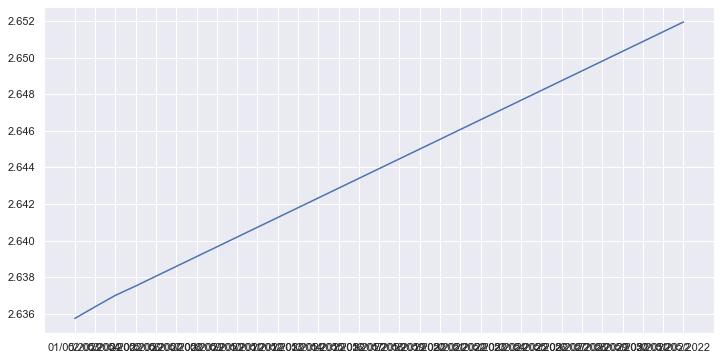

In [52]:
#Sentiment same plot
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
plt.savefig('var_trad_forecast.png')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('BEIR')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Actual Inflation')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylim(2.5,3)
# show a legend on the plot
plt.legend()
plt.savefig('var_forecast.png')
# Display a figure.
plt.show()

In [53]:
def train_test_plot(model, X_train, X_test, name):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,6))
    colors = sns.color_palette("deep", 8)
    plt.ylim(2.5,3)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"date": list(yvalues.index), "BEIR_fcast": forecasted})
    df_fcast = df_fcast.set_index("date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["BEIR_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("BEIR vs. Model's BEIR")
    ax.set_ylabel("BEIR")
    ax.legend(["Forecasted BEIR","Actual BEIR"])
    plt.savefig(name)

In [54]:
df_results['BEIR_forecast']

date
01/05/2022    2.635749
02/05/2022    2.636387
03/05/2022    2.637010
04/05/2022    2.637521
05/05/2022    2.638058
06/05/2022    2.638592
07/05/2022    2.639126
08/05/2022    2.639660
09/05/2022    2.640194
10/05/2022    2.640728
11/05/2022    2.641262
12/05/2022    2.641797
13/05/2022    2.642331
14/05/2022    2.642865
15/05/2022    2.643399
16/05/2022    2.643933
17/05/2022    2.644467
18/05/2022    2.645002
19/05/2022    2.645536
20/05/2022    2.646070
21/05/2022    2.646604
22/05/2022    2.647138
23/05/2022    2.647672
24/05/2022    2.648206
25/05/2022    2.648741
26/05/2022    2.649275
27/05/2022    2.649809
28/05/2022    2.650343
29/05/2022    2.650877
30/05/2022    2.651411
31/05/2022    2.651946
Name: BEIR_forecast, dtype: float64

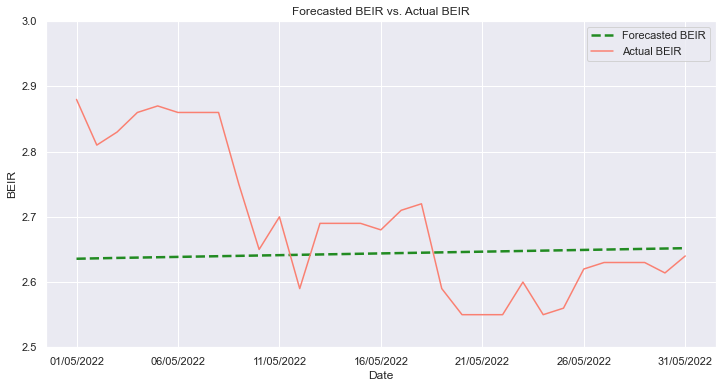

In [62]:
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("deep", 8)
plt.ylim(2.5,3)
    
#yvalues = pd.DataFrame(y_test)
    
df_results['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
df_test["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
ax.set_title("Forecasted BEIR vs. Actual BEIR")
ax.set_ylabel("BEIR")
ax.set_xlabel("Date")
ax.legend(["Forecasted BEIR","Actual BEIR"])
plt.savefig('var_forecast.png')

In [63]:
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [64]:
#Forecast MSE
metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)

0.12278665486743452

In [65]:
rmse = metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)
error = (rmse/np.mean(df_test['BEIR']))*100
error
#We see that the RMSE is quite low compared to the mean (9.3% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

4.563246338612787

In [ ]:
df_results

In [60]:
df_test = train_df[-31:]

In [82]:
a = pd.read_csv('BEIR_forecast_w_OASOSS.csv')

In [83]:
a

,date,BEIR_forecast
0,01/05/2022,2.643733
1,02/05/2022,2.640652
2,03/05/2022,2.641845
3,04/05/2022,2.642312
4,05/05/2022,2.642881
5,06/05/2022,2.643443
6,07/05/2022,2.644005
7,08/05/2022,2.644568
8,09/05/2022,2.645130
9,10/05/2022,2.645693


In [84]:
df_results['BEIR_forecast']

date
01/05/2022    2.635749
02/05/2022    2.636387
03/05/2022    2.637010
04/05/2022    2.637521
05/05/2022    2.638058
06/05/2022    2.638592
07/05/2022    2.639126
08/05/2022    2.639660
09/05/2022    2.640194
10/05/2022    2.640728
11/05/2022    2.641262
12/05/2022    2.641797
13/05/2022    2.642331
14/05/2022    2.642865
15/05/2022    2.643399
16/05/2022    2.643933
17/05/2022    2.644467
18/05/2022    2.645002
19/05/2022    2.645536
20/05/2022    2.646070
21/05/2022    2.646604
22/05/2022    2.647138
23/05/2022    2.647672
24/05/2022    2.648206
25/05/2022    2.648741
26/05/2022    2.649275
27/05/2022    2.649809
28/05/2022    2.650343
29/05/2022    2.650877
30/05/2022    2.651411
31/05/2022    2.651946
Name: BEIR_forecast, dtype: float64

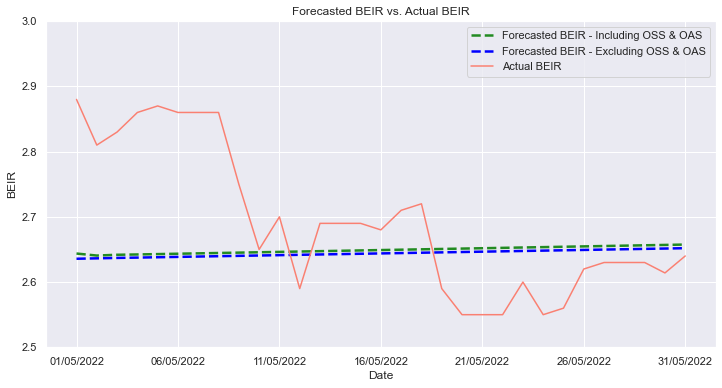

In [85]:
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("deep", 8)
plt.ylim(2.5,3)
    
#yvalues = pd.DataFrame(y_test)
    
a['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
df_results['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="blue") # CPI fitted
df_test['BEIR'].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
ax.set_title("Forecasted BEIR vs. Actual BEIR")
ax.set_ylabel("BEIR")
ax.set_xlabel("Date")
ax.legend(["Forecasted BEIR - Including OSS & OAS","Forecasted BEIR - Excluding OSS & OAS",'Actual BEIR'])
plt.savefig('var_forecast_14-08.png')

In [90]:
a['BEIR_forecast'].to_csv('var.csv')

Random Forest

In [86]:
b = pd.read_csv('rf_forecast_comp.csv')
b = b.iloc[:,1:]

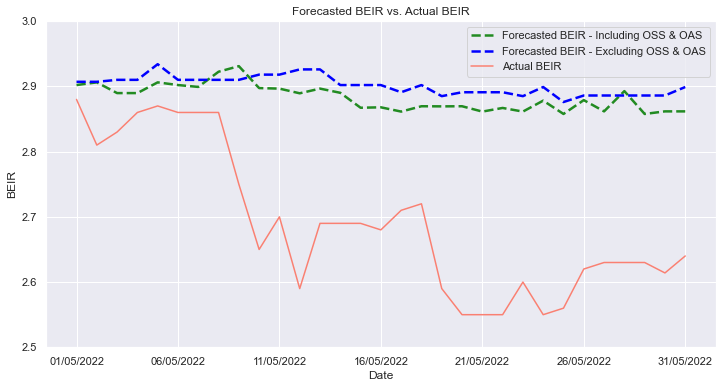

In [96]:
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("deep", 8)
plt.ylim(2.5,3)
    
#yvalues = pd.DataFrame(y_test)
    
b['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
b['BEIR_forecast_exc'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="blue") # CPI fitted
df_test['BEIR'].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
ax.set_title("Forecasted BEIR vs. Actual BEIR")
ax.set_ylabel("BEIR")
ax.set_xlabel("Date")
ax.legend(["Forecasted BEIR - Including OSS & OAS","Forecasted BEIR - Excluding OSS & OAS",'Actual BEIR'])
plt.savefig('rf_forecast_14-08.png')

All Forecasts

In [92]:
#merge all forecasts with OSS OAS
var = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/Modelling/var.csv')
xgb = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/Modelling/xgb.csv')
rf = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/Modelling/rf.csv')
svr = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/Modelling/svr.csv')
lasso = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/Modelling/lasso.csv')
beir = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/Modelling/test.csv')

In [93]:
var = var.iloc[:,1]
xgb = xgb.iloc[:,1]
rf = rf.iloc[:,1]
svr = svr.iloc[:,1]
lasso = lasso.iloc[:,1]

In [94]:
beir['var'] = var
beir['xgb'] = xgb
beir['rf'] = rf
beir['svr'] = svr
beir['lasso'] = lasso
beir = beir.set_index('date')

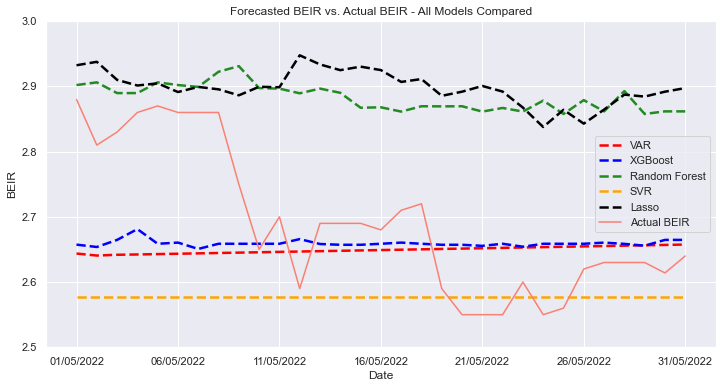

In [99]:
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("deep", 8)
plt.ylim(2.5,3)
    
#yvalues = pd.DataFrame(y_test)
    
beir['var'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="red") # CPI fitted
beir['xgb'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="blue") # CPI fitted
beir['rf'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
beir['svr'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="orange") # CPI fitted
beir['lasso'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="black") # CPI fitted
beir['BEIR'].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
ax.set_title("Forecasted BEIR vs. Actual BEIR - All Models Compared")
ax.set_ylabel("BEIR")
ax.set_xlabel("Date")
ax.legend(["VAR",'XGBoost','Random Forest','SVR','Lasso','Actual BEIR'])
plt.savefig('all_forecasts_14-08.png')